<a href="https://colab.research.google.com/github/shagufi-enam/E-commerce/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
# from scipy.stats import kstest # KS test for Normality

In [2]:
df=pd.read_csv("/content/bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19-12-2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19-12-2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19-12-2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Checking the Duplicate **rows**

In [5]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  0


# Checking the missing value

In [6]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There is no missing value in this dataset

In [7]:
def dist_check(df, col_name):

  print(df[col_name].value_counts())

In [8]:
col_list = ['workingday',	'holiday',	'weather', 'season']
for col in col_list:
  dist_check(df, col)
  print("\n")


workingday
1    7412
0    3474
Name: count, dtype: int64


holiday
0    10575
1      311
Name: count, dtype: int64


weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# Change the datatypes

In [10]:
df["datetime"]=pd.to_datetime(df['datetime'],format="%d-%m-%Y %H:%M") #Replace object to datetime  data type

In [11]:
df["season"].unique()

array([1, 2, 3, 4])

In [12]:
#Converting int dtype into object dtype
df["season"]=df["season"].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [13]:
#converting int dtype into object
df["weather"]=df["weather"].replace({1: 'cloudy', 2: 'misty', 3: 'rainy', 4: 'thunderstorm'})
df["weather"].unique()

array(['cloudy', 'misty', 'rainy', 'thunderstorm'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1020.7+ KB


In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
holiday,10886.0,0.028569,0.0,0.0,0.0,0.0,1.0,0.166599
workingday,10886.0,0.680875,0.0,0.0,1.0,1.0,1.0,0.466159
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454


In [16]:
df.describe(include="object")

,season,weather
count,10886,10886
unique,4,4
top,winter,cloudy
freq,2734,7192


# Finding unique values

In [17]:

df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


separate numerical columns and categorical columns

In [18]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(include="object").columns


# Univariant Analysis

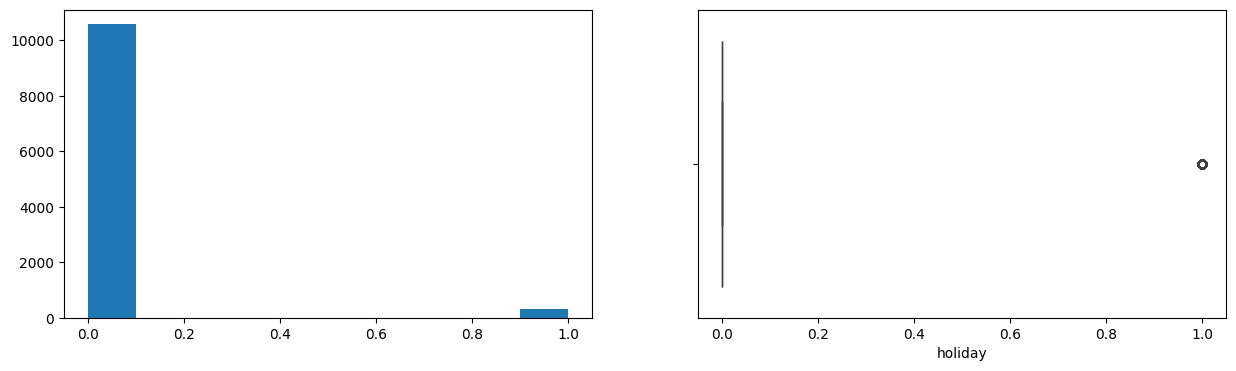

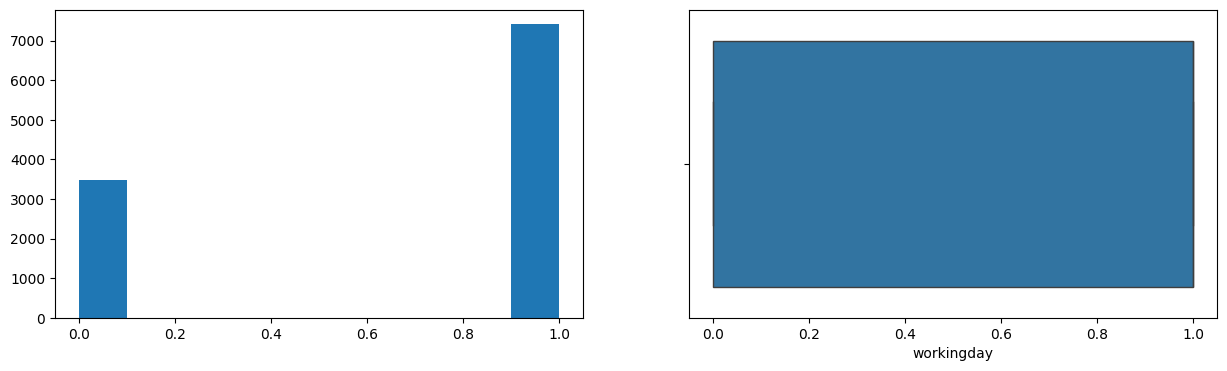

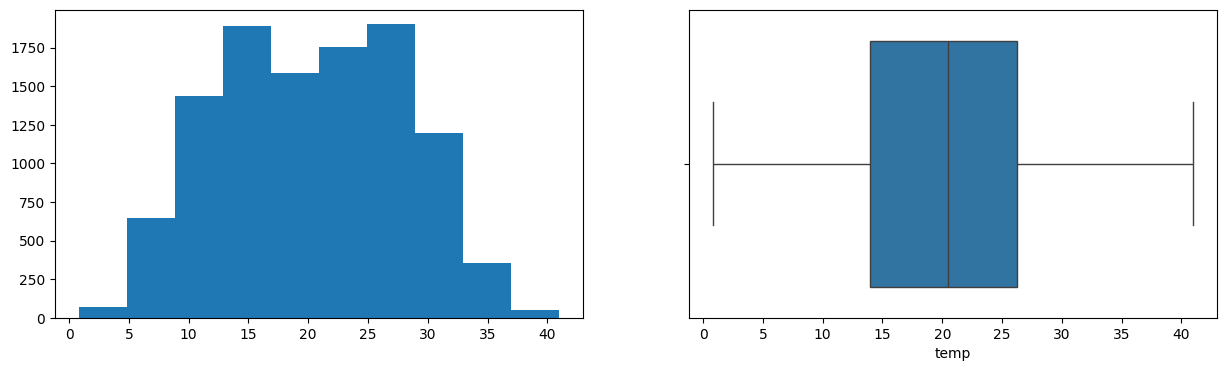

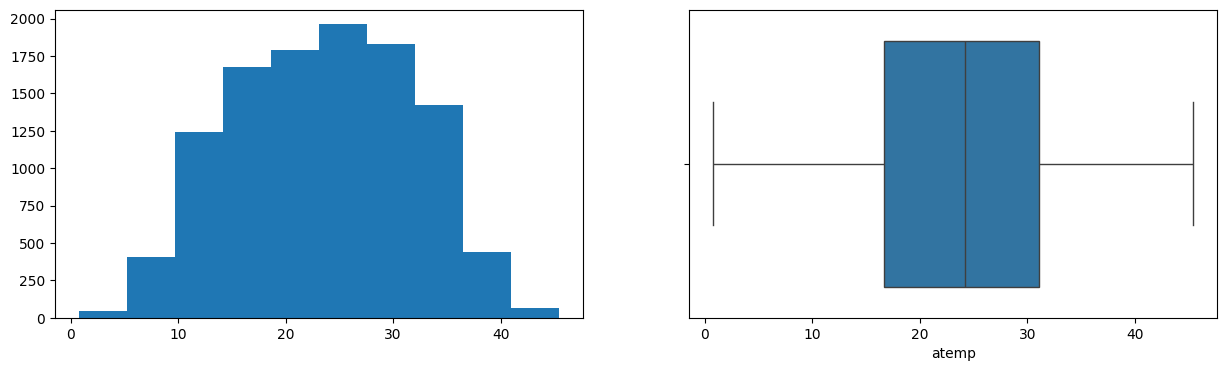

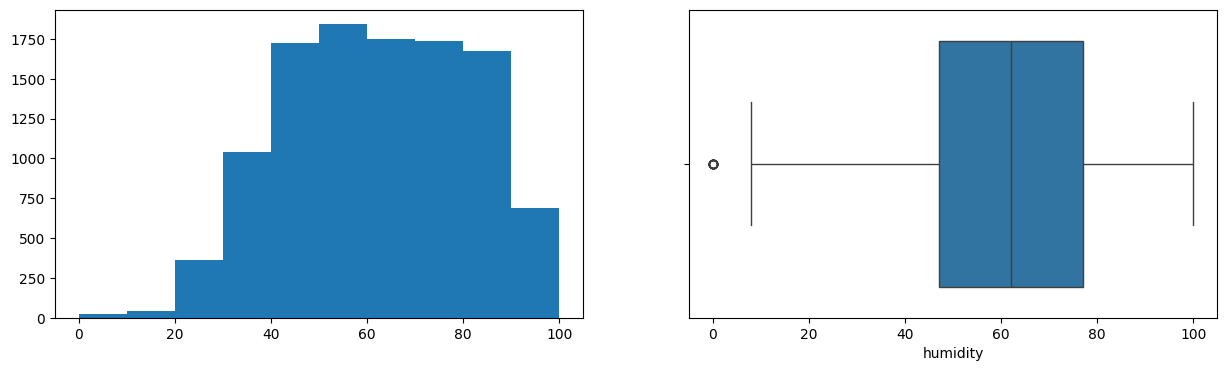

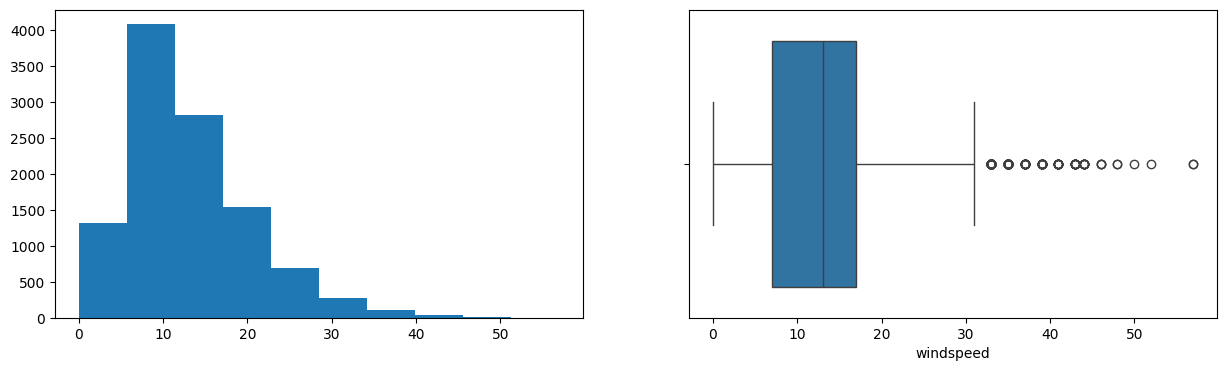

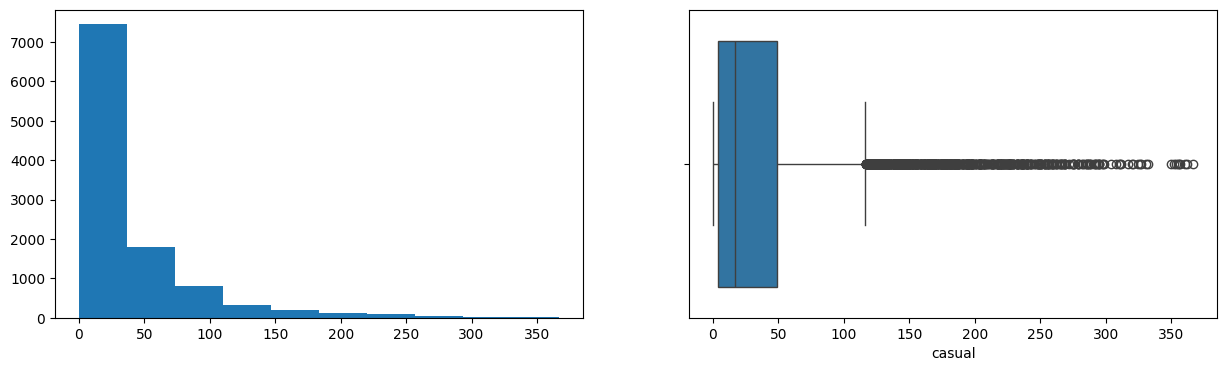

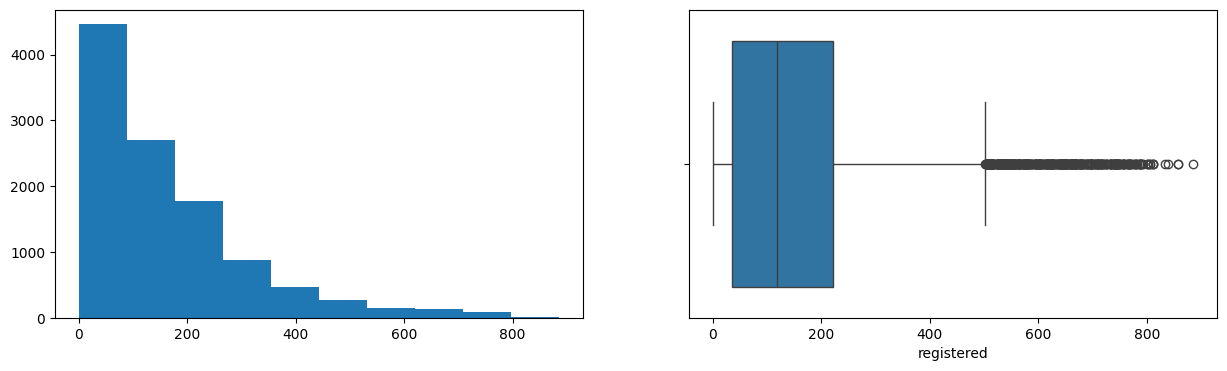

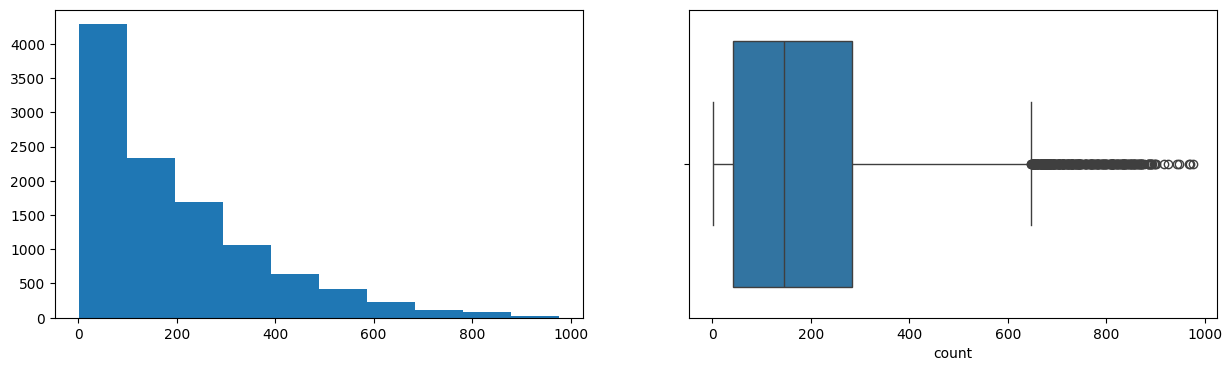

In [19]:
for col in num_col:
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  df[col].hist(grid=False)
  plt.subplot(1,2,2)
  sbn.boxplot(x=df[col])
  plt.show()

# Graphical Analysis

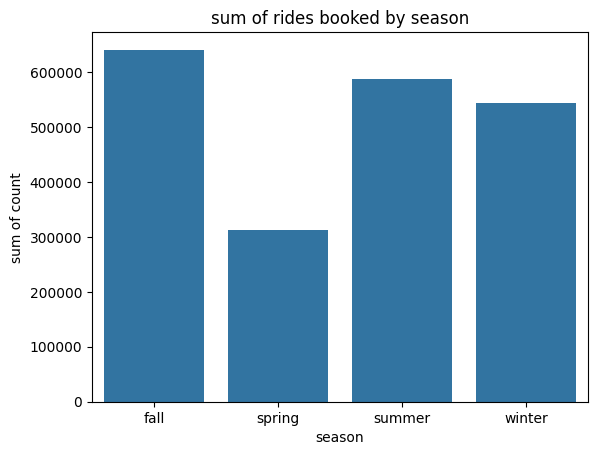

In [20]:
 #Calculate the sum of 'count' column for each season
season_count_sum=df.groupby("season")["count"].sum().reset_index()
sbn.barplot(data=season_count_sum,x="season",y="count")
plt.title("sum of rides booked by season")
plt.xlabel("season")
plt.ylabel("sum of count")
plt.show()

Observation:During the Fall season more number of bikes booked

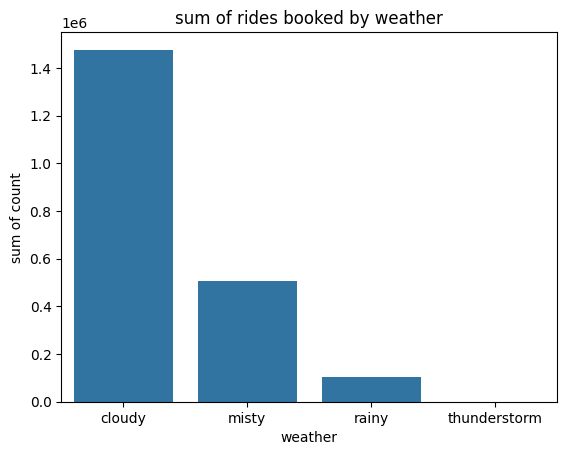

In [21]:
weather_count_sum=df.groupby("weather")["count"].sum().reset_index()
sbn.barplot(data=weather_count_sum,x="weather",y="count")
plt.title("sum of rides booked by weather")
plt.xlabel("weather")
plt.ylabel("sum of count")
plt.show()

Observation: During Cloudy weather more number of bikes booked by users.

In [22]:
casual_sum =  np.sum(df['casual'])
registered_sum =  np.sum(df['registered'])

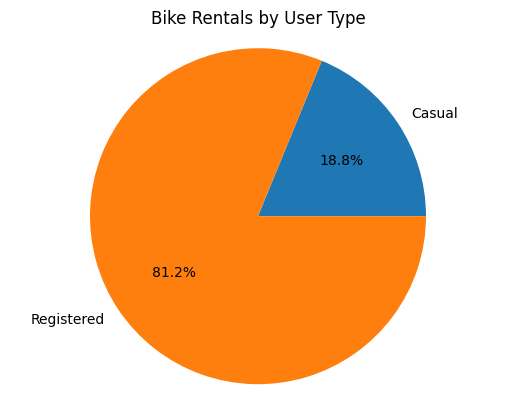

In [23]:

# Create a list of values
counts = [casual_sum, registered_sum]

# Create a list of labels
labels = ['Casual', 'Registered']

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Bike Rentals by User Type')

# Set aspect ratio to be equal to create a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

Observation:Percentage of Bike rentals by registered user is more compared to the Casual.

In [59]:
# Sum of bikes rented on a working day
bikes_rented_workingday = df[df['workingday'] == 1]['count'].sum()

# Sum of bikes rented on a holiday
bikes_rented_holiday = df[df['holiday'] == 1]['count'].sum()

# Print the results
print("Total bikes rented on a working day:", bikes_rented_workingday)
print("Total bikes rented on a holiday:", bikes_rented_holiday)

Total bikes rented on a working day: 1430604
Total bikes rented on a holiday: 57808


Text(0.5, 1.0, 'Distribution of Bikes Rented on Working Day and Holiday')

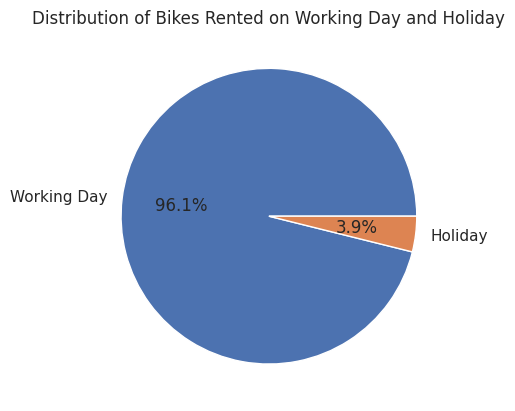

In [60]:

# Create labels for the pie chart
labels = ['Working Day', 'Holiday']

# Create values for the pie chart
values = [bikes_rented_workingday, bikes_rented_holiday]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Distribution of Bikes Rented on Working Day and Holiday')

# Display the pie chart

**Observation:Distribution of Bikes rented on working Day is more compared to Holiday.**

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

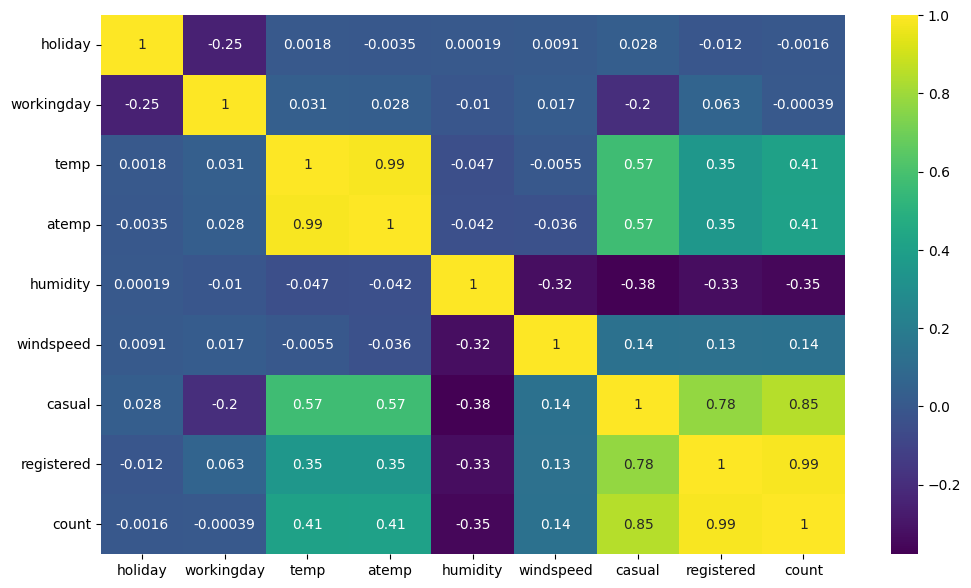

In [25]:
#Correlation Heatmap -

plt.figure(figsize=(12, 7))
sbn.heatmap(numeric_df.corr(method="spearman"),
            annot=True, cmap='viridis')
plt.show()


from the correlation we can verify some logical points:

feeling temperature or aparent temprature and temp are highly correlated, because they are most of the times approximately the same have a very small diffrerence
count, causal, registered are all correlated to each other because all of them are linked as per: causal + registered = count

In [26]:
# Dropping highly correlated columns -
dfn = df.drop(columns=['casual', 'registered', 'atemp'])

# Outlier detection using box plot

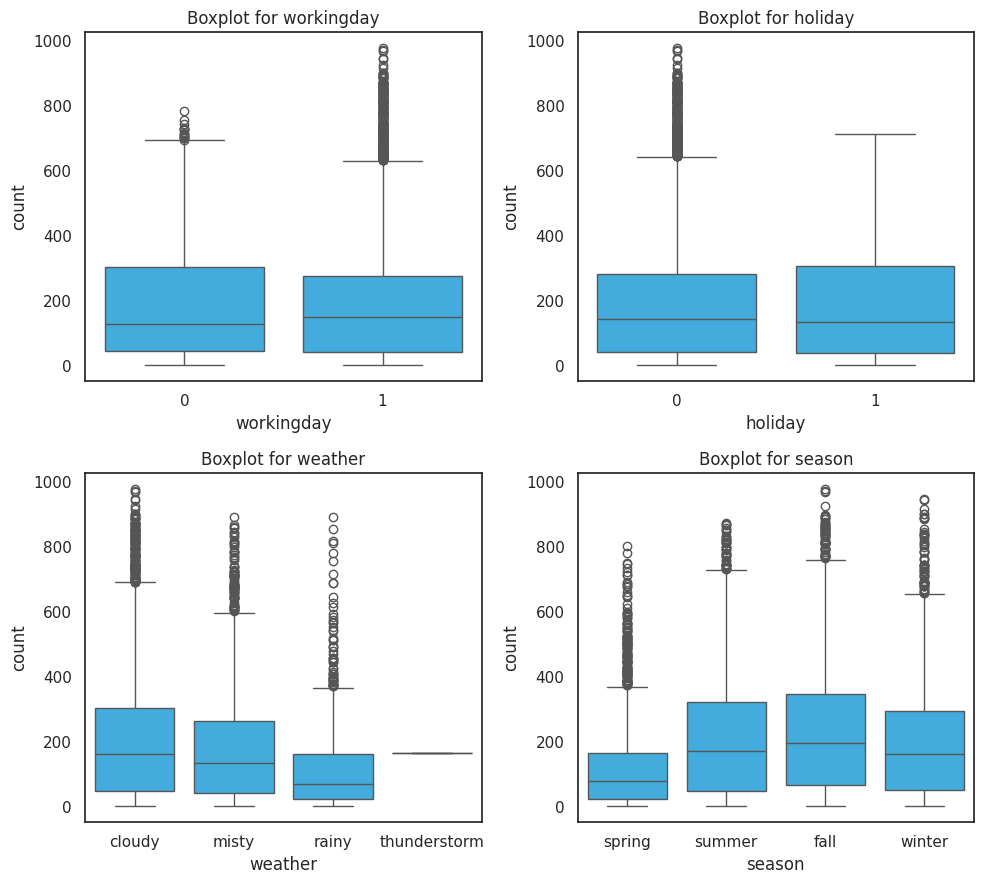

In [27]:
plt.figure(figsize=(10, 9))
sbn.set(style="white")

for i, column in enumerate(col_list,1):
    plt.subplot(2, 2, i)
    sbn.boxplot(x=column, y='count', data=dfn, color="#29B6F6")
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()
plt.show()


# Now checking the distribution of target value "count"

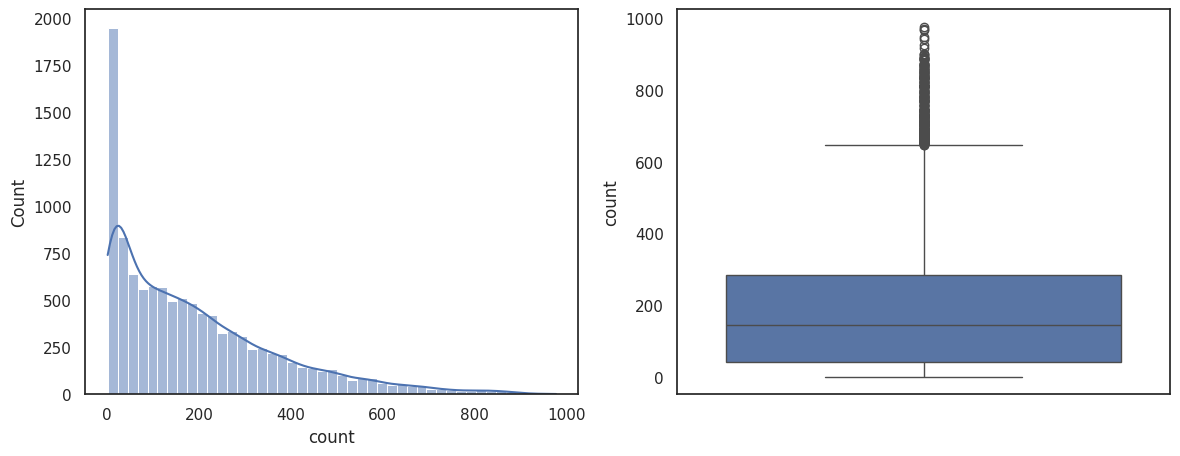

In [28]:
#Histogram plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sbn.histplot(x=dfn["count"],kde=True)
#Boxplot
plt.subplot(1,2,2)
sbn.boxplot(y=dfn["count"])
plt.show()

We can see that outliers are present in the given columns. We need to figure


out a way to deal with them before starting with the tests.

We have multiple options available on how to proceed with these outlier values.

Try to understand if these values make any sense according to the business problem.

.If yes, then we can keep them as it is.
In case these outliers are some invalid values which do not make much sense, we can remove them using the IQR.

Or we can apply a log transformation on the data to reduce the effect of these outliers.
-
The outliers in the given data set are the no. of bike rides per session/day. These values could sometimes be higher than expected due to increase in the crowd on certain days/occasions.

These data values are important for capturing variations in the data. Hence, in this case,

 the ideal approach of dealing with outliers would be to leave them as it is.
But since the tests that we are going to apply are based on the assumption that the dataset is normal or near normal, we will drop those outlier values using the IQR method.

# Data after Transform using log transformation

In [61]:
df["count_n"]=np.log(dfn["count"])

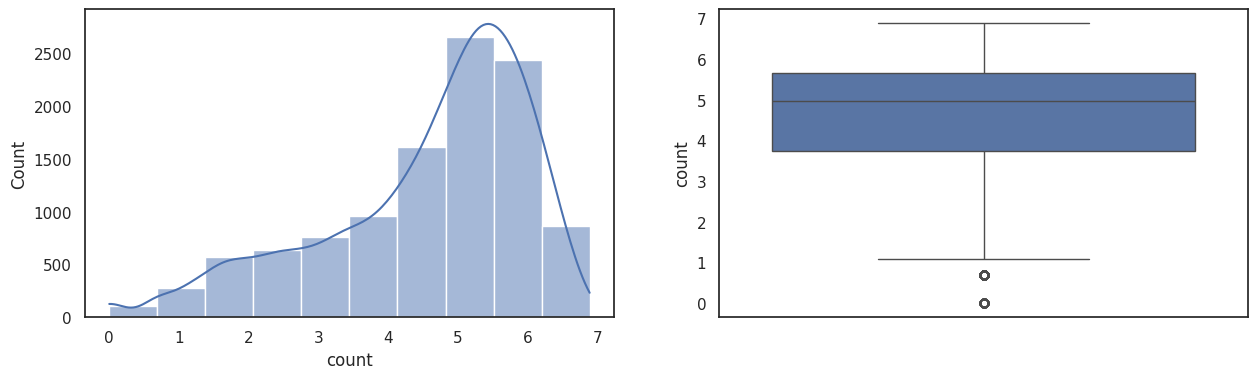

In [62]:
plt.figure(figsize=(15,4))
#historam plot
plt.subplot(1,2,1)
sbn.histplot(np.log(dfn["count"]),kde=True,bins=10)
#Boxplot
plt.subplot(1,2,2)
sbn.boxplot(np.log(dfn["count"]))
plt.show()

# **Aggregating total no. of bikes of given factor**

In [31]:
#Weather
dfn.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
cloudy,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
misty,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
rainy,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
thunderstorm,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [32]:
#season
dfn.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [33]:
#workingday
dfn.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [34]:
#holiday
dfn.groupby("holiday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


check **normality** of target value **count**

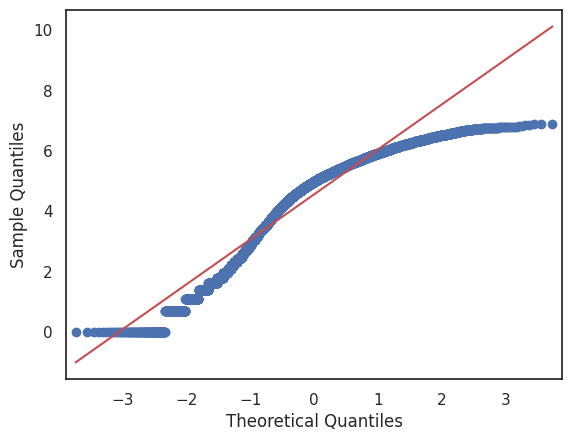

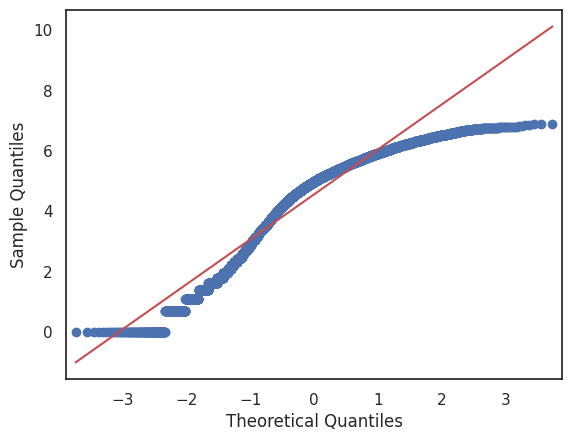

In [35]:
dfn["count_n"]=np.log(dfn["count"])
sm.qqplot(dfn["count_n"],line="s")

# Ques. 1 - Is there any significant difference between the no. of bike rides on weekdays and weekends?

# step 1 Define Null hypothesis and Alternate hypothesis

H0:  The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.

Ha: The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let μ1 and μ2 be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

H0:μ1>=μ2

Ha:μ1<μ2

# Step 2:Select appropriate test
Note standard deviation of population is not known so in this condition we choice two sample independent ttest


In [36]:
weekday=dfn[dfn["workingday"]==1]["count"].values

weekend=dfn[dfn["workingday"]==0]["count"].values

# step 3: Decide significant level
 alpha=0.05

In [37]:
alpha=0.05

# Step 4: Calculate p_value

In [38]:
test_stat,p_value=ttest_ind(weekday,weekend,alternative="less")
test_stat,p_value

(1.2096277376026694, 0.8867759788681933)

In [39]:
def result(p_value,alpha):
  if p_value<alpha:
    print('we reject the null hypothesis')
  else:
    print("we fail to reject the null hypothesis")
result(p_value,alpha)


we fail to reject the null hypothesis


**Observation**: Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis.
Hence, we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.

# Ques. 2 - Is there any significant difference between the no. of bike rides on regular days and holidays?

# Step 1 : Define Null hypothesis and alternative hypothesis
Ho:Demand of bikes on regular days is greater or equal to demand of bikes on holiday

Ha:Demand of bikes on regular days less than the demand of bikes on holidays

# step 2: select appropriate test
In this problem statment population standard deviation is unknown so we choice two sample independent ttest

# step 3:Select siginificant level
alpha=0.05

In [40]:
holiday=dfn[dfn["holiday"]==1]["count"].sample(299)
regular=dfn[dfn["holiday"]==0]["count"].sample(299)

In [41]:
test_stat,p_value=ttest_ind(regular,holiday,alternative="less")
test_stat,p_value

(0.8638073479359365, 0.8059793885827629)

In [42]:
def result(p_value,alpha):
  if p_value<alpha:
    print('we reject the null hypothesis')
  else:
    print("we fail to reject the null hypothesis")
result(p_value,alpha)


we fail to reject the null hypothesis


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays.

# Ques. 3 - Is the demand of bicycles on rent same for different weather conditions?

# Anova testing

In [43]:
dfn.groupby("weather").size()

,0
weather,
cloudy,7192
misty,2834
rainy,859
thunderstorm,1


**step 1**: Define the null and alternate hypothesis

**H0:**  The average no. of bike rides in different weather conditions are equal.


**Ha:**  The average no. of bike rides in different weather conditions are not equal.


In [44]:
w1 = dfn[dfn['weather'] == "cloudy"]['count'].values

w2 = dfn[dfn['weather'] == "misty"]['count'].values
w3 = dfn[dfn['weather'] == "rainy"]['count'].values
w4 = dfn[dfn['weather'] =="thunderstrom"]['count'].values

In [45]:
dfn.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
cloudy,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
misty,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
rainy,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
thunderstorm,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


This is a problem, concerning three independent population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

**.**The samples are independent.

**.**Each sample is from a normally distributed population.



**.**The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and euality of variance of the data set -

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

# Shapiro-Wilk's Test

In [46]:

w, p_value = shapiro(dfn['count'].sample(4999))
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  1.1013121498715005e-52
we reject the null hypothesis


# Levene's Test

In [47]:
#Assumption 2: Homogeneity of Variance

stat, p_value = levene(w1, w2, w3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  6.198278710731511e-36
we reject the null hypothesis


Observation:In above we see assumtion are not true for given set of data.so,in this condition we can perform Kruskal-Wallis test or Central limit theorem.

# One-Way Anova Test

In [48]:
stat,p_value=stats.f_oneway(w1,w2,w3)
stat,p_value


(98.28356881946706, 4.976448509904196e-43)

In [49]:
def result(p_value,alpha):
  if p_value<alpha:
    print('we reject the null hypothesis')
  else:
    print("we fail to reject the null hypothesis")
result(p_value,alpha)

we reject the null hypothesis


Here P_value<0.05 ,so,we reject the Null hypothesis,we can conclude that  the average no. of bike rides in different weather conditions are not equal.

# Central limit theorem



*   According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger.


*   In other words, if we find the mean of a large number of independent random variables, the mean will follow a normal distribution.




*   
In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.
Hence, if data size is large enough then no need to worry about non normality od data distribution before applying the test.





# What are some of the basic methods (other than statistical tests) to test the normality & homogeneity of variance?

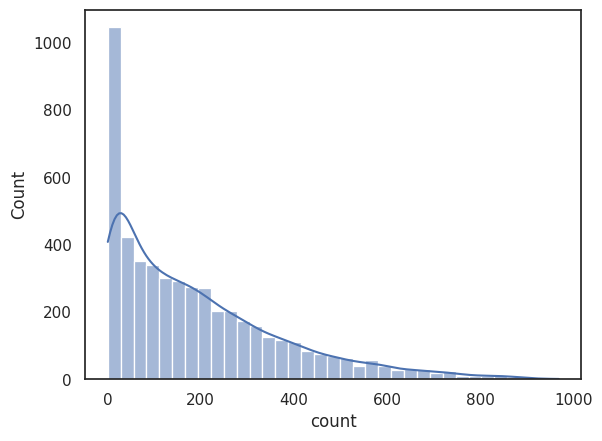

In [50]:
#Histogram
#check the bell curve to identify the normality
sbn.histplot(dfn["count"].sample(4999),kde=True)
plt.show()

In [51]:
# Method 2: Check skewness & kurtosis
# Skewness should be close to 0 and Kurtosis close to 3.

print("Skewness : ", df['count'].skew())
print("Kurtosis : ", df['count'].kurt())

Skewness :  1.2420662117180776
Kurtosis :  1.3000929518398334


# To check for Homogeneity of Variance

In [52]:
# Method 1:
print(w1.var(), w2.var(), w3.var())

35323.8862270764 28337.246435435423 19182.418761290777


# Is the demand of bicycles on rent same for different seasons?

In [53]:
dfn["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

# Step 1: Define the null and alternate hypothesis

H0:  The average no. of bike rides in different seasons are equal.

Ha:  The average no. of bike rides in different seasons are not equal.

# Step 2: Select an appropriate test

In [54]:
s1=dfn[dfn["season"]=="spring"]["count"].values

s2=dfn[dfn["season"]=="summer"]["count"].values
s3=dfn[dfn["season"]=="fall"]["count"].values
s4=dfn[dfn["season"]=="winter"]["count"].values

# Step 3: Decide the significance level
The significance level (α) is already set to 5% i.e., 0.05

**Step 4: Calculate the p-value**

In [55]:
#Perform the Anova test
t_stat,p_value=stats.f_oneway(s1,s2,s3,s4)

print('p-value=', p_value)

p-value= 6.164843386499654e-149


Observation: Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.

# Are the weather conditions significantly different during different seasons?

we will comparing two different categorical variable "weather" and "season" so,in this condition we will perform Chisquare Test.

In [56]:
contigency=pd.crosstab(dfn["weather"],dfn["season"])
contigency

season,fall,spring,summer,winter
weather,,,,
cloudy,1930,1759,1801,1702
misty,604,715,708,807
rainy,199,211,224,225
thunderstorm,0,1,0,0


<Axes: xlabel='weather'>

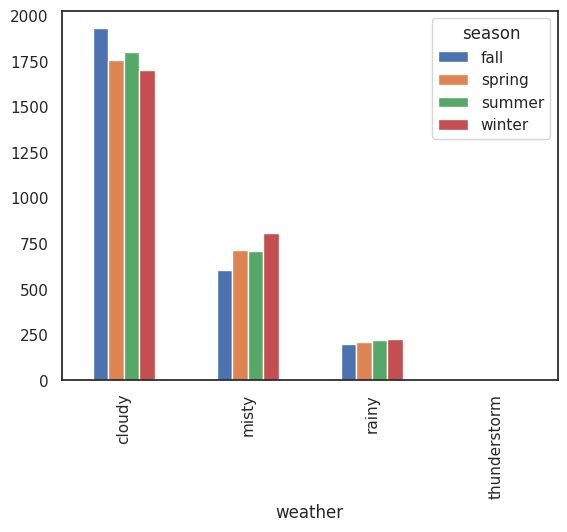

In [57]:
contigency.plot(kind="bar")

In [58]:
stats.chi2_contingency(contigency)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01]]))

observation: p_value is less than significance level so,we reject the null hypothesis.so that weather condition is depend on the season.

# Insights and Recommendations

**EDA based insights** -

Total 10,886 rows were present in the data set.
Neither missing values, nor duplicate rows were found.

'temp' and 'atemp' columns were found to be highly correlated.
Dropping one of them (atemp) to avoid multicollinearity.

'count', 'casual' and 'registered' columns were highly correlated.
Dropping casual & registered columns to avoid multicollinearity.

Outlier values were found in the 'count' column.

**Insights from hypothesis testing -**

The no. of bikes rented on weekdays is comparatively higher than on weekends.

The no. of bikes rented on regular days is comparatively higher than on holidays.

The demand of bicycles on rent differs under different weather conditions.

The demand of bicycles on rent is different during different seasons.

The weather conditions are surely dependent upon the ongoing season.

Miscellaneous observations -

The distribution of 'count' column wasn't actually normal or near normal.

Infact the column's distribution is found to be a bit skewed towards right.

Generic recommendations -
The demand of bikes on rent are usually higher during Weekdays.

The demand of bikes on rent are usually higher during Regular days.

The chances of person renting a bike are usually higher during Season Fall.

The chances of person renting a bike are usually higher during Weather
 Cloudy.
We recommend the company to maintain the bike stocks accordingly.
